In [29]:
import geopandas as gpd
import numpy as np
import xarray as xr
from shapely.geometry import Point, Polygon

In [80]:
import sys
sys.path.append('../Extreme_precip_Norway/2_Scripts/modules/')

from progress_bar import update_progress

In [152]:
regions = gpd.read_file('./regions/cavm_all polygon.dbf')

In [164]:
regions_latlon = regions.copy()
regions_latlon['geometry'] = regions_latlon['geometry'].to_crs(epsg=4326)

<AxesSubplot:>

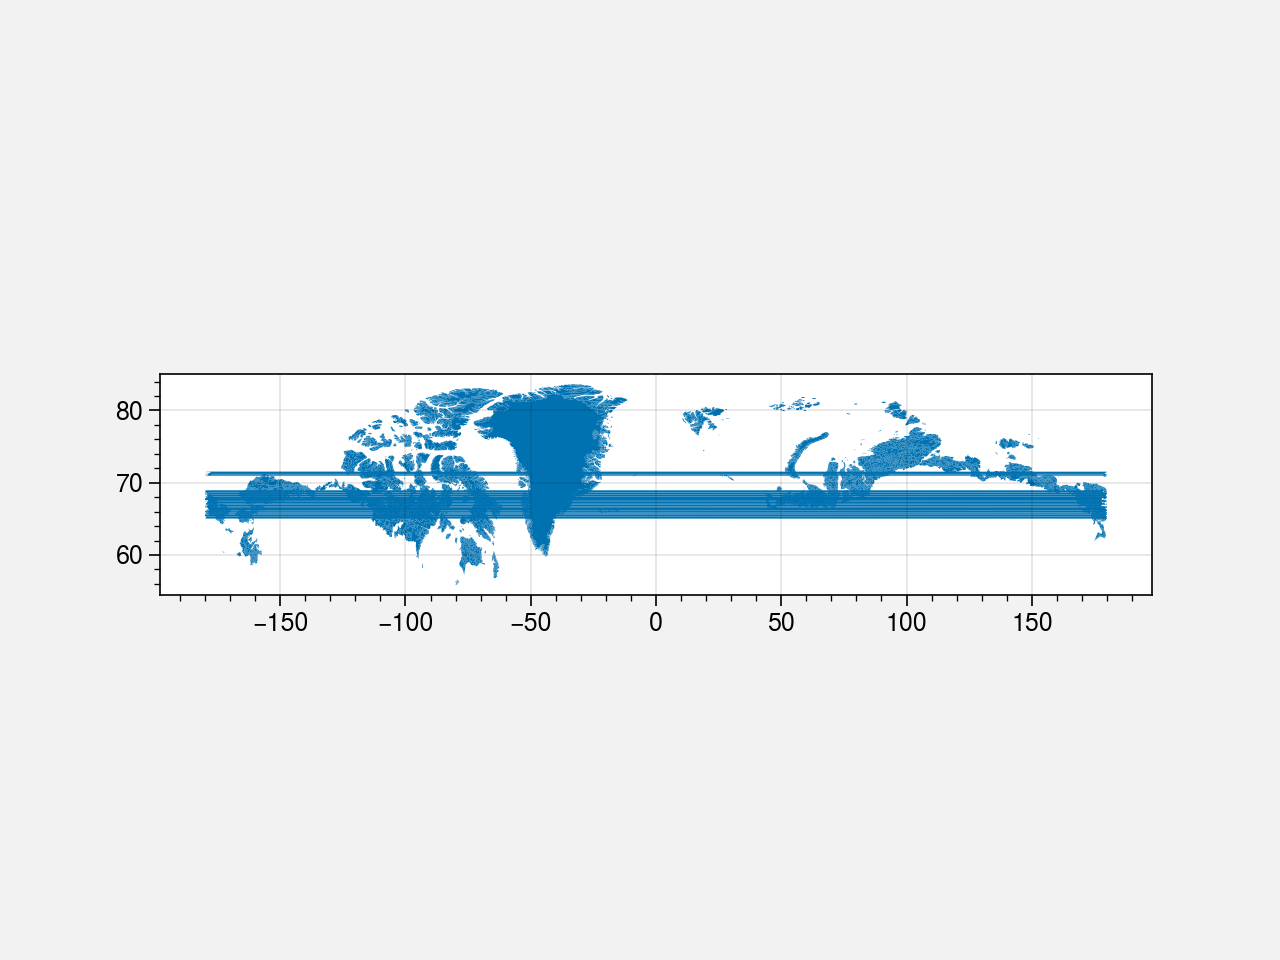

In [166]:
regions_latlon.plot()

In [108]:
def grid_regions(da,regions):
    '''
    This function checks if whether a point is within a region or not.
    A point is here lat and lon from da

    It returns the number of the region if the point is within that region.

    Input
    -------
    da : xarray dataset with lats lons
    
    
    
    Returns
    -------
    grid_xr: dataset (xarray) with grid_region as one of the variables on the lat lon grid

    '''
    grid_region = np.ones((da.latitude.size,da.longitude.size))*np.nan

    for rr in np.unique(regions.ZONE):
        region =  regions.query('ZONE==@rr') 
        print(rr)
        
        
        
        for i,r in enumerate(region.geometry):
            update_progress(i/len(region))
            for yy,lat in enumerate(da.latitude.values):
                for xx,lon in enumerate(da.longitude.values):
                    p_ = Point(lon,lat)

                    a = r.contains(p_)
                    if a:
                        grid_region[yy,xx] = rr


    grid_xr = xr.Dataset({'grid_region':(['latitude','longitude'],grid_region)},
                          coords={'latitude': da.latitude,
                                'longitude': da.longitude})
    return grid_xr



In [139]:
dummyData = xr.DataArray(data=np.random.rand(40,360),
                         dims = ['latitude','longitude'],
                      coords = {
                          'latitude' : np.arange(50,90),
                          'longitude' : np.arange(-180,180)
                      })

In [140]:
zones = grid_regions(dummyData,regions)

0
Percent: [----------------------------------------] 0% 1
Percent: [########################################] 99% 2
Percent: [########################################] 99% 3
Percent: [########################################] 99% 4
Percent: [########################################] 99% 5
Percent: [########################################] 99% 6
Percent: [#######################################-] 96% 

In [144]:
zones

<xarray.Dataset>
Dimensions:      (latitude: 40, longitude: 360)
Coordinates:
  * latitude     (latitude) int64 50 51 52 53 54 55 56 ... 83 84 85 86 87 88 89
  * longitude    (longitude) int64 -180 -179 -178 -177 -176 ... 176 177 178 179
Data variables:
    grid_region  (latitude, longitude) float64 nan nan nan nan ... nan nan nan

In [117]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

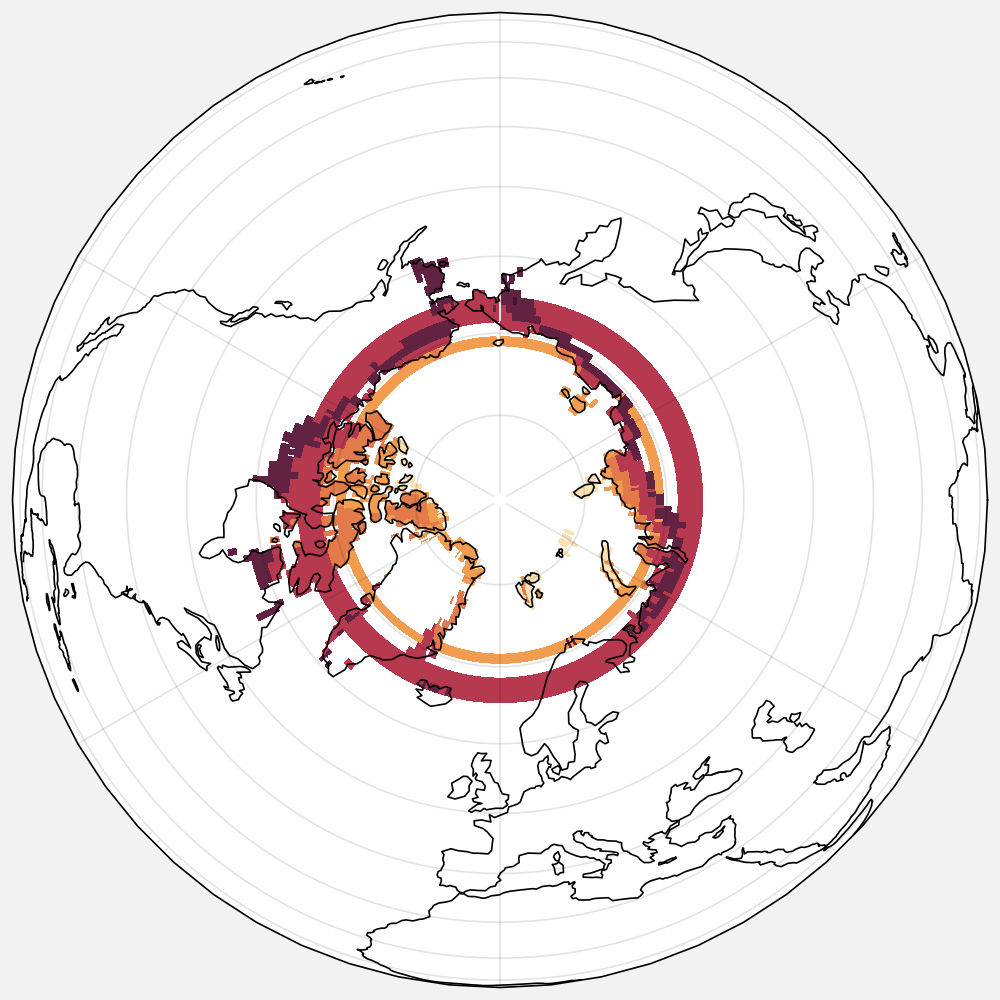

In [145]:
fig,ax = plot.subplots(projection=ccrs.Orthographic(central_latitude=90),figsize=(5,5))
ax.coastlines()
ax.pcolormesh(zones.grid_region,transform=ccrs.PlateCarree())

<AxesSubplot:>

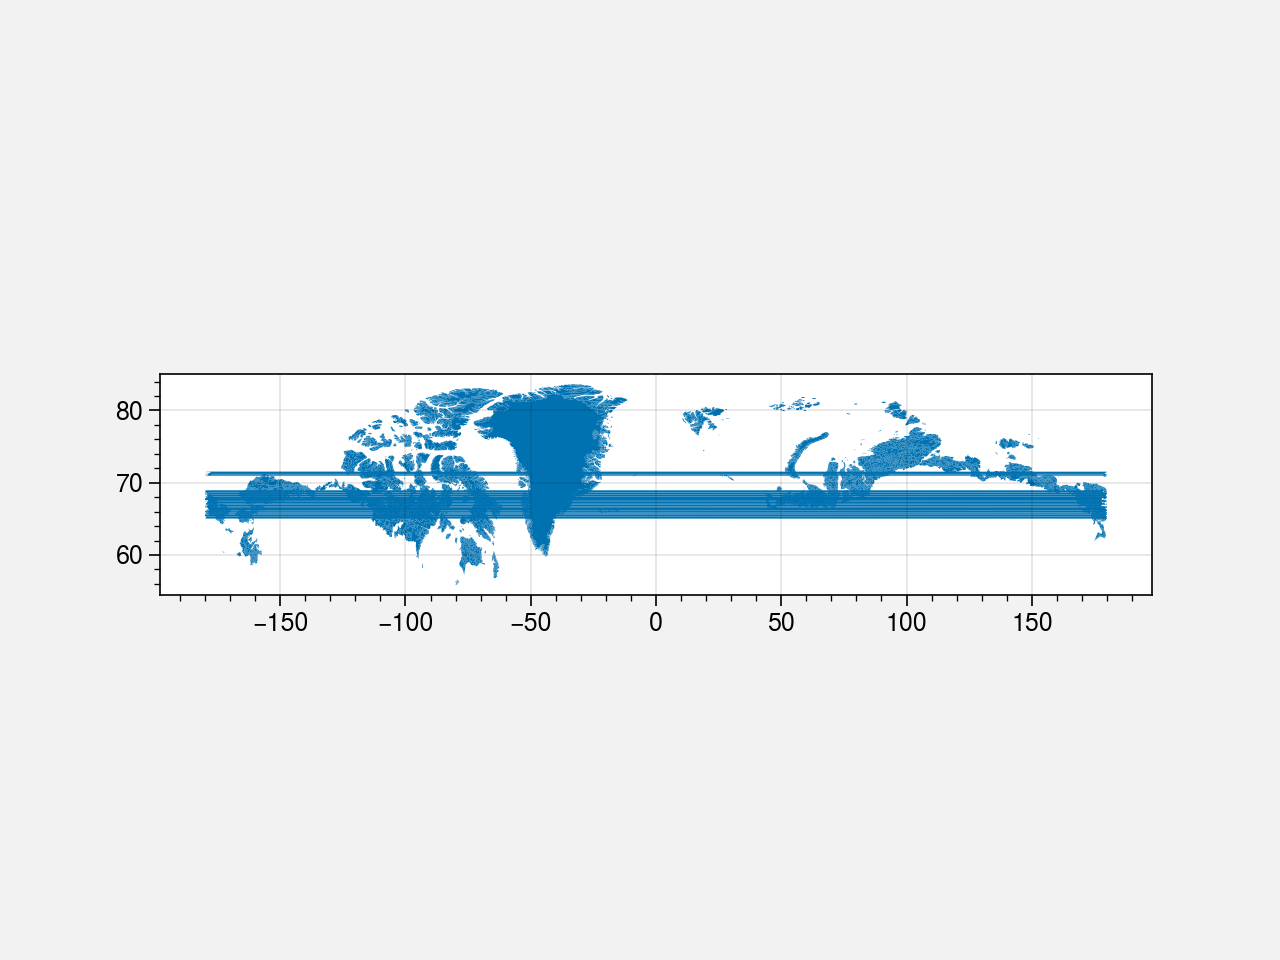

In [147]:
regions.plot()